# Epidemic Prediction
Quick intro about what the project is and what work we did in it?

## Input Data
`07_feature_engineering_and_cleaning.csv`
   *   116109 rows total

### Dates
   *   99 unique dates
   
### Locations
   *   1218 unique locations

### Features
   *   temperature: `max_temp`, `max_temp1`, `max_temp2`, `mean_temp`, `mean_temp1`, `mean_temp2`, `min_temp`, `min_temp1`, `min_temp2`
   *   dew point: `dew_point`, `dew_point1`, `dew_point2`
   *   precipitation: `precipitation`, `precipitation1`, `precipitation2`
   *   wind: `wind`, `wind1`, `wind2`
   *   `density_per_km`
   *   `airport_dist_any`
   *   `airport_dist_large`
   *   `mosquito_dist`
   
### Outputs
   *   `zika_cases`
   *   Number of cases reported on that day (assume)

In [1]:
# Run for demo
import sys
import os
from visualize_data import *
from models import *
from test_parameters import *

# Set up working directory
if os.getcwd().endswith("notebooks"):
    current_dir = os.getcwd()
    up_dir = current_dir.split("/")[0:-1]
    os.chdir("/".join(up_dir))

# Read the relevant input data
zika_cases = pd.read_csv("csv_data/03_infection_data_final.csv")
all_data = pd.read_csv("csv_data/07_feature_engineering_and_cleaning.csv")

# Make sure to use CPU for these small models
setup_gpu(gpu=False)


Using TensorFlow backend.


In [2]:
# Visualize the zika cases vs time
#plot_zika_cases_vs_time(zika_cases)

In [3]:
# Visualize the feature importance
#plot_feature_output_correlation(all_data)

## Simple Classifier

In [2]:
# Run for demo
# Get up input data using the small dataset
data_sm = get_data(big_set=False)
print("The length of the training data is {}".format(len(data_sm["X_train"])))
print("The length of the testing data is {}".format(len(data_sm["X_test"])))

# Set up the simple classifier
simple_classifier_sm = build_simple_classifier(data_sm["X_train"])
print(simple_classifier_sm.summary())

The length of the training data is 970
The length of the testing data is 243
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________
None


In [3]:
# Run for demo
# Set up parameters
params = {
    #"epochs": [1, 5, 10, 20, 50, 100],
    #"batch_size": [5, 10, 20, 50, 100]
    "epochs": [1, 5, 10, 20],
    "batch_size": [10, 20, 50, 100]
}
simple_classifier_results_sm = test_simple_classifier(simple_classifier_sm, data_sm, params)

accuracy for {'epochs': 1, 'batch_size': 5}: 0.720164609053498
accuracy for {'epochs': 1, 'batch_size': 10}: 0.7530864197530864
accuracy for {'epochs': 1, 'batch_size': 20}: 0.7613168724279835
accuracy for {'epochs': 1, 'batch_size': 50}: 0.7777777777777778
accuracy for {'epochs': 1, 'batch_size': 100}: 0.7777777777777778
accuracy for {'epochs': 5, 'batch_size': 5}: 0.7860082304526749
accuracy for {'epochs': 5, 'batch_size': 10}: 0.8395061728395061
accuracy for {'epochs': 5, 'batch_size': 20}: 0.7983539094650206
accuracy for {'epochs': 5, 'batch_size': 50}: 0.8559670781893004
accuracy for {'epochs': 5, 'batch_size': 100}: 0.8477366255144033
accuracy for {'epochs': 10, 'batch_size': 5}: 0.7860082304526749
accuracy for {'epochs': 10, 'batch_size': 10}: 0.8148148148148148
accuracy for {'epochs': 10, 'batch_size': 20}: 0.823045267489712
accuracy for {'epochs': 10, 'batch_size': 50}: 0.8724279835390947
accuracy for {'epochs': 10, 'batch_size': 100}: 0.8518518518518519
accuracy for {'epochs'

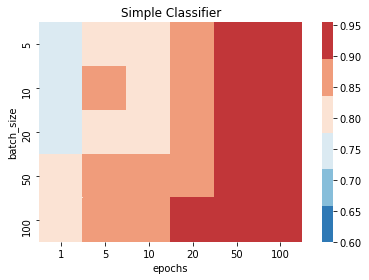

<Figure size 432x288 with 0 Axes>

In [4]:
# Run for demo
# Visualize Results
plot_simple_classifier_heatmap(simple_classifier_results_sm)

In [3]:
# Try 1000 epochs
params = {
    "epochs": [1000],
    "batch_size": [50]
}
simple_classifier_results_1000 = test_simple_classifier(simple_classifier_sm, data_sm, params)

accuracy for {'epochs': 1000, 'batch_size': 50}: 0.9094650205761317


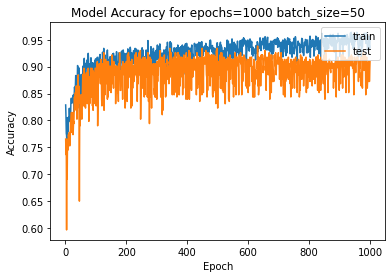

In [4]:
plot_history(simple_classifier_results_1000)

Accuracy is highly variable, probably because dataset is so small

In [9]:
# Set up input data using the large dataset
data_lg = get_data(big_set=True)
print("The length of the training data is {}".format(len(data_lg["X_train"])))
print("The length of the testing data is {}".format(len(data_lg["X_test"])))

# Set up the simple classifier
simple_classifier_lg = build_simple_classifier(data_lg["X_train"])

The length of the training data is 92887
The length of the testing data is 23222


In [8]:
# WARNING: THIS TAKES A LONG TIME

# Test the same parameters on the large dataset
simple_classifier_results_lg = test_simple_classifier(simple_classifier_lg, data_lg, params)

accuracy for {'epochs': 1, 'batch_size': 5}: 0.8740418568598742
accuracy for {'epochs': 1, 'batch_size': 10}: 0.8746447334424253
accuracy for {'epochs': 1, 'batch_size': 20}: 0.8740849194729137
accuracy for {'epochs': 1, 'batch_size': 50}: 0.8743002325381104
accuracy for {'epochs': 1, 'batch_size': 100}: 0.874127982085953
accuracy for {'epochs': 5, 'batch_size': 5}: 0.875204547411937
accuracy for {'epochs': 5, 'batch_size': 10}: 0.8740849194729137
accuracy for {'epochs': 5, 'batch_size': 20}: 0.8758504866075273
accuracy for {'epochs': 5, 'batch_size': 50}: 0.8757643613814486
accuracy for {'epochs': 5, 'batch_size': 100}: 0.8760657996727241
accuracy for {'epochs': 10, 'batch_size': 5}: 0.8746016708293859
accuracy for {'epochs': 10, 'batch_size': 10}: 0.8755490483162518
accuracy for {'epochs': 10, 'batch_size': 20}: 0.8761949875118422
accuracy for {'epochs': 10, 'batch_size': 50}: 0.875204547411937
accuracy for {'epochs': 10, 'batch_size': 100}: 0.8749031091206615
accuracy for {'epochs':

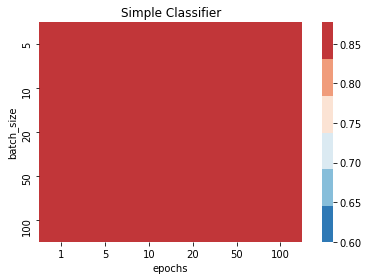

<Figure size 432x288 with 0 Axes>

In [9]:
# Visualize Results
plot_simple_classifier_heatmap(simple_classifier_results_lg)

## SVM

In [7]:
# Run for demo
# Start with small data again
svm_classifier = svm.SVC()
svm_results_sm = model_predict(
        'svm',
        svm_classifier,
        data_sm,
    )
print("accuracy for small dataset: {}".format(svm_results_sm["accuracy"]))

accuracy for small dataset: 0.7901234567901234


In [10]:
# Now try large dataset
svm_results_lg = model_predict(
        'svm',
        svm_classifier,
        data_lg,
    )
print("accuracy for large dataset: {}".format(svm_results_lg["accuracy"]))

accuracy for large dataset: 0.8740418568598742


## K-Nearest Neighbours

In [12]:
# Run for demo
# Test various neighbours with the small dataset
neighbours = [1, 2, 5, 10, 20, 50, 100]
knn_results_sm = test_knn(data_sm, neighbours)

accuracy for n_neighbours=1: 0.9423868312757202
accuracy for n_neighbours=2: 0.9135802469135802
accuracy for n_neighbours=5: 0.9012345679012346
accuracy for n_neighbours=10: 0.8930041152263375
accuracy for n_neighbours=20: 0.8641975308641975
accuracy for n_neighbours=50: 0.8395061728395061
accuracy for n_neighbours=100: 0.8024691358024691


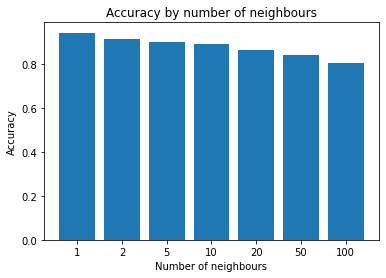

<Figure size 432x288 with 0 Axes>

In [13]:
# Visualize Results
plot_knn_bar(knn_results_sm)

In [14]:
# Test various neighbours with the large dataset
neighbours = [1, 2, 5, 10, 20, 50, 100]
knn_results_lg = test_knn(data_lg, neighbours)

accuracy for n_neighbours=1: 0.8260270433209888
accuracy for n_neighbours=2: 0.8751184221858582
accuracy for n_neighbours=5: 0.874730858668504
accuracy for n_neighbours=10: 0.8832572560502971
accuracy for n_neighbours=20: 0.8810180001722504
accuracy for n_neighbours=50: 0.8764103005770391
accuracy for n_neighbours=100: 0.8761088622857635


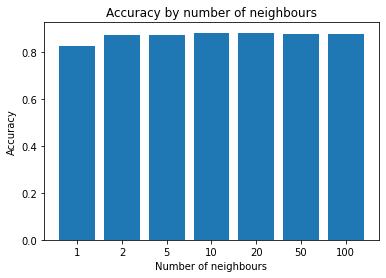

<Figure size 432x288 with 0 Axes>

In [13]:
# Visualize results
plot_knn_bar(knn_results_lg)

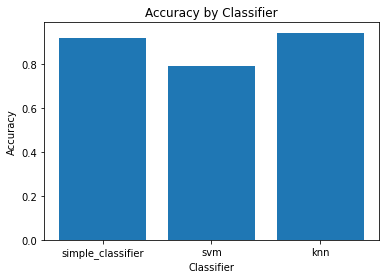

<Figure size 432x288 with 0 Axes>

In [14]:
# Run for demo
# Look at all results for the small dataset
all_results_sm = [simple_classifier_results_sm, [svm_results_sm], knn_results_sm]
plot_all_results(all_results_sm)

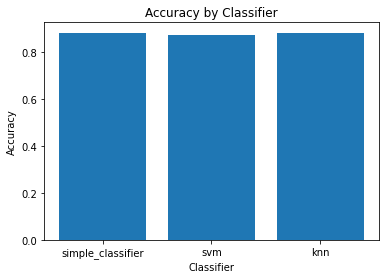

<Figure size 432x288 with 0 Axes>

In [15]:
# Look at all results for the large dataset
all_results_lg = [simple_classifier_results_lg, [svm_results_lg], knn_results_lg]
plot_all_results(all_results_lg)